In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from IPython.display import Image
from statsmodels.tsa.seasonal import seasonal_decompose

# Load in weather data from 2011-2022
Read in yearly weather data dataframes for each year.  
Create one dataframe containing all of the data.  
And a dictionary containing the data for each year

**NOTE: in revised version we no longer store yearly weather data, so this wont work**

In [2]:
all_years_weather_df = pd.read_csv('../Cleaned_data/WeatherData/weather_data_allyears.csv', index_col= 'datetime')
# Convert the index to datetime
all_years_weather_df.index=pd.to_datetime(all_years_weather_df.index, dayfirst=True)
all_years_weather_df['day_no'] = all_years_weather_df.index.day

# Create the dictionary of each year's weather (bit of a legacy as we no longer store yearly weather data,
# so the rest of the script could access the all_years_weather_df directly)
all_years_weather_dict = {}
for year in all_years_weather_df.index.year.unique():
    all_years_weather_dict[year] = all_years_weather_df.loc[all_years_weather_df.index.year==year]

## Plot weather variables for one year

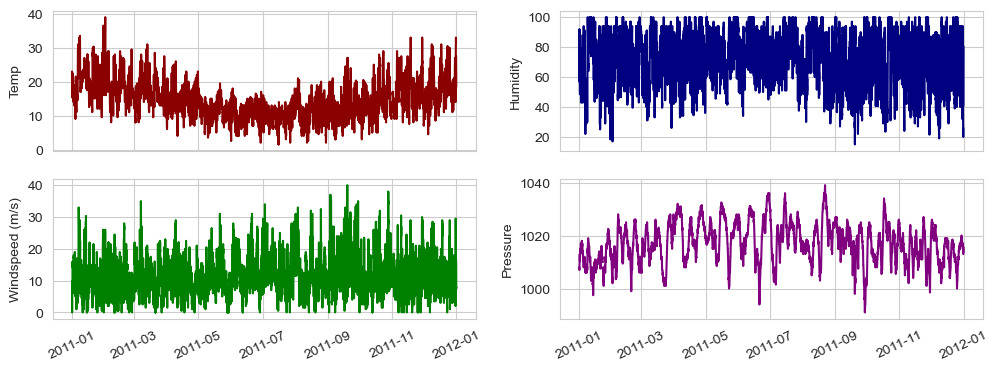

In [3]:
this_years_weather = all_years_weather_dict[2011]
this_years_weather
fig,axs = plt.subplots(2,2, figsize = (12,4), sharex = True)
axs[0,0].plot(this_years_weather.index,this_years_weather['Temp'], color = 'darkred')
axs[0,0].set_ylabel("Temp")
axs[0,1].plot(this_years_weather.index,this_years_weather['Humidity'], color = 'navy')
axs[0,1].set_ylabel("Humidity")
axs[1,0].plot(this_years_weather.index,this_years_weather['WindSpeed'], color = 'green')
axs[1,0].tick_params(axis='x', labelrotation= 25 )
axs[1,0].set_ylabel("Windspeed (m/s)")
axs[1,1].plot(this_years_weather.index,this_years_weather['Pressure'], color = 'purple')
axs[1,1].tick_params(axis='x', labelrotation= 25 )
axs[1,1].set_ylabel("Pressure")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

## Compare weather variables for two years

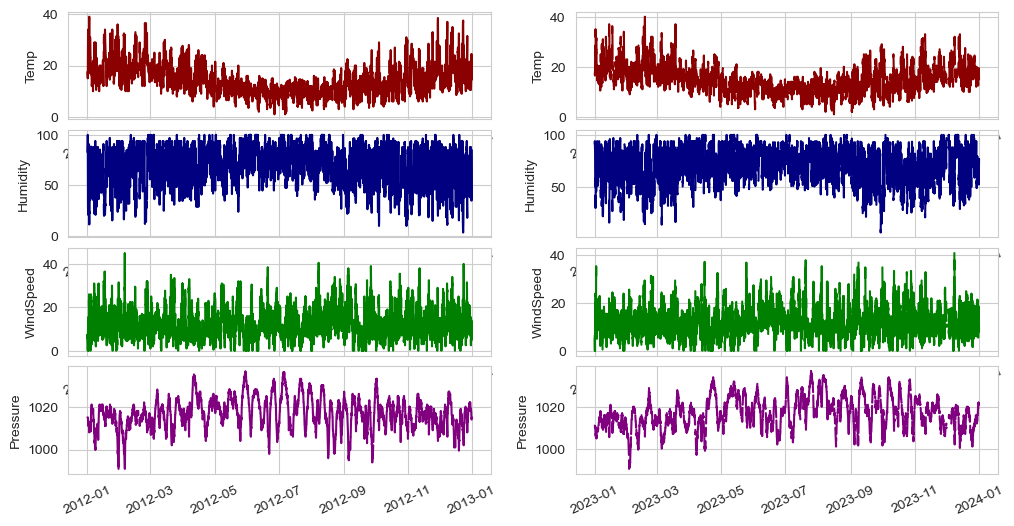

In [5]:
year1=2012
year2=2023

this_years_weather = all_years_weather_dict[year1]
fig, axs = plt.subplots(4, 2, figsize=(12, 6))
axs[0, 0].plot(all_years_weather_dict[year1].index, all_years_weather_dict[year1]['Temp'], color='darkred')
axs[0, 0].set_ylabel("Temp")
axs[0, 0].tick_params(axis='x', labelrotation=25)
axs[0, 1].plot(all_years_weather_dict[year2].index, all_years_weather_dict[year2]['Temp'], color='darkred')
axs[0, 1].set_ylabel("Temp")
axs[0, 1].tick_params(axis='x', labelrotation=25)

axs[1, 0].plot(all_years_weather_dict[year1].index, all_years_weather_dict[year1]['Humidity'], color='navy')
axs[1, 0].set_ylabel("Humidity")
axs[1, 0].tick_params(axis='x', labelrotation=25)
axs[1, 1].plot(all_years_weather_dict[year2].index, all_years_weather_dict[year2]['Humidity'], color='navy')
axs[1, 1].set_ylabel("Humidity")
axs[1, 1].tick_params(axis='x', labelrotation=25)

axs[2, 0].plot(all_years_weather_dict[year1].index, all_years_weather_dict[year1]['WindSpeed'], color='green')
axs[2, 0].set_ylabel("WindSpeed")
axs[2, 0].tick_params(axis='x', labelrotation=25)
axs[2, 1].plot(all_years_weather_dict[year2].index, all_years_weather_dict[year2]['WindSpeed'], color='green')
axs[2, 1].set_ylabel("WindSpeed")
axs[2, 1].tick_params(axis='x', labelrotation=25)

axs[3, 0].plot(all_years_weather_dict[year1].index, all_years_weather_dict[year1]['Pressure'], color='purple')
axs[3, 0].set_ylabel("Pressure")
axs[3, 0].tick_params(axis='x', labelrotation=25)
axs[3, 1].plot(all_years_weather_dict[year2].index, all_years_weather_dict[year2]['Pressure'], color='purple')
axs[3, 1].set_ylabel("Pressure")
axs[3, 1].tick_params(axis='x', labelrotation=25)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)